In [1]:
import os
import glob
import cv2
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import numpy as np
# encoding labels catogories
from sklearn.preprocessing import LabelEncoder
# multi class encoding
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.
C:\Users\Light\anaconda3\envs\dogs-vs-cats\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Light\anaconda3\envs\dogs-vs-cats\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Light\anaconda3\envs\dogs-vs-cats\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Light\anaconda3\e

In [4]:
# train and validation directories
train_dir = 'D:\\something-something-project\\train-images\\'
validation_dir = 'D:\\something-something-project\\validation-images\\'

In [5]:
# listing images directory for train and validation
train_files = os.listdir(train_dir)
print (train_files)

validation_files = os.listdir(validation_dir)
print (validation_files)

['Dropping_something', 'Holding_something', 'Moving_something', 'Picking_something', 'Poking_something', 'Pouring_something', 'Putting_something', 'Showing_something', 'Tearing_something']
['Dropping_something', 'Holding_something', 'Moving_something', 'Picking_something', 'Poking_something', 'Pouring_something', 'Putting_something', 'Showing_something', 'Tearing_something']


In [6]:
# generating the full system path
train_files_dir = []
validation_files_dir = []

for f in train_files:
    if os.path.join(train_dir, f):
        train_files_dir.append(os.path.join(train_dir, f))
        
for f in validation_files:
    if os.path.join(validation_dir, f):
        validation_files_dir.append(os.path.join(validation_dir, f))
        
print (train_files_dir)
print (validation_files_dir)

['D:\\something-something-project\\train-images\\Dropping_something', 'D:\\something-something-project\\train-images\\Holding_something', 'D:\\something-something-project\\train-images\\Moving_something', 'D:\\something-something-project\\train-images\\Picking_something', 'D:\\something-something-project\\train-images\\Poking_something', 'D:\\something-something-project\\train-images\\Pouring_something', 'D:\\something-something-project\\train-images\\Putting_something', 'D:\\something-something-project\\train-images\\Showing_something', 'D:\\something-something-project\\train-images\\Tearing_something']
['D:\\something-something-project\\validation-images\\Dropping_something', 'D:\\something-something-project\\validation-images\\Holding_something', 'D:\\something-something-project\\validation-images\\Moving_something', 'D:\\something-something-project\\validation-images\\Picking_something', 'D:\\something-something-project\\validation-images\\Poking_something', 'D:\\something-somethin

In [7]:
# printing number of images in each directories
print ("Training Data")
for dt in train_files_dir:
    print (dt, len(os.listdir(dt)))

Training Data
D:\something-something-project\train-images\Dropping_something 15941
D:\something-something-project\train-images\Holding_something 25433
D:\something-something-project\train-images\Moving_something 56940
D:\something-something-project\train-images\Picking_something 3841
D:\something-something-project\train-images\Poking_something 14179
D:\something-something-project\train-images\Pouring_something 7280
D:\something-something-project\train-images\Putting_something 64208
D:\something-something-project\train-images\Showing_something 15682
D:\something-something-project\train-images\Tearing_something 11816


In [8]:
# printing number of images in each directories
print ("Validation Data")
for dv in validation_files_dir:
    print (dv, len(os.listdir(dv)))

Validation Data
D:\something-something-project\validation-images\Dropping_something 3108
D:\something-something-project\validation-images\Holding_something 4148
D:\something-something-project\validation-images\Moving_something 7463
D:\something-something-project\validation-images\Picking_something 774
D:\something-something-project\validation-images\Poking_something 1618
D:\something-something-project\validation-images\Pouring_something 2023
D:\something-something-project\validation-images\Putting_something 7867
D:\something-something-project\validation-images\Showing_something 2627
D:\something-something-project\validation-images\Tearing_something 3851


In [10]:
# loading training data
train_data = []
train_labels = []
for d in train_files_dir:
    print ('Directory: ', d)
    # commenting out so that one can read all the images, I have less RAM
    count = 0
    files = glob.glob(d + "/*.jpg")
    imgs = []
    for img in files:
        # print (img)
        if count == 1000:
            break
        if not os.path.isfile(img):
            continue
        imgs.append(cv2.imread(img))
        train_labels.append(d.split("D:\\something-something-project\\train-images\\")[1])
        count += 1
    train_data = train_data + imgs

Directory:  D:\something-something-project\train-images\Dropping_something
Directory:  D:\something-something-project\train-images\Holding_something
Directory:  D:\something-something-project\train-images\Moving_something
Directory:  D:\something-something-project\train-images\Picking_something
Directory:  D:\something-something-project\train-images\Poking_something
Directory:  D:\something-something-project\train-images\Pouring_something
Directory:  D:\something-something-project\train-images\Putting_something
Directory:  D:\something-something-project\train-images\Showing_something
Directory:  D:\something-something-project\train-images\Tearing_something


In [12]:
# loading validation data
validation_data = []
validation_labels = []
for d in validation_files_dir:
    print ('Directory: ', d)
    count = 0
    files = glob.glob(d + "/*.jpg")
    imgs = []
    for img in files:
        if count == 1000:
            break
        if not os.path.isfile(img):
            continue
        imgs.append(cv2.imread(img))
        validation_labels.append(d.split("D:\\something-something-project\\validation-images\\")[1])
        count += 1
    validation_data = validation_data + imgs

Directory:  D:\something-something-project\validation-images\Dropping_something
Directory:  D:\something-something-project\validation-images\Holding_something
Directory:  D:\something-something-project\validation-images\Moving_something
Directory:  D:\something-something-project\validation-images\Picking_something
Directory:  D:\something-something-project\validation-images\Poking_something
Directory:  D:\something-something-project\validation-images\Pouring_something
Directory:  D:\something-something-project\validation-images\Putting_something
Directory:  D:\something-something-project\validation-images\Showing_something
Directory:  D:\something-something-project\validation-images\Tearing_something


In [13]:
print ("Train Data: ", len(train_data), "\tTrain Labels: ", len(train_labels))
print ("Validation Data: ", len(validation_data), "\tValidation Labels: ", len(validation_labels))

Train Data:  9000 	Train Labels:  9000
Validation Data:  8774 	Validation Labels:  8774


In [14]:

# Training Data (there are some corrupted files, so use the next column)
IMG_DIM = (124, 124)

train_imgs = [img_to_array(cv2.resize(img, IMG_DIM)) for img in train_data]
train_imgs = np.array(train_imgs)

validation_imgs = [img_to_array(cv2.resize(img, IMG_DIM)) for img in validation_data]
validation_imgs = np.array(validation_imgs)

In [15]:
print('Train dataset shape:', train_imgs.shape, '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (9000, 124, 124, 3) 	Validation dataset shape: (8774, 124, 124, 3)


In [16]:
batch_size = 30
num_classes = 9
epochs = 30
input_shape = ( 124, 124, 3)

# one hot encoding for training and validation
label_encoder = LabelEncoder()
train_labels_integer_encoded = label_encoder.fit_transform(train_labels)
validation_labels_integer_encoded = label_encoder.fit_transform(validation_labels)

# print(train_labels_integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
train_labels_integer_encoded = train_labels_integer_encoded.reshape(len(train_labels_integer_encoded), 1)
train_label_enc = onehot_encoder.fit_transform(train_labels_integer_encoded)

validation_labels_integer_encoded = validation_labels_integer_encoded.reshape(len(validation_labels_integer_encoded), 1)
validation_label_enc = onehot_encoder.fit_transform(validation_labels_integer_encoded)

In [17]:
from keras.models import Sequential

from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(124,124,3)))

model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(9, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_imgs, train_label_enc, validation_data=(validation_imgs, validation_label_enc), epochs=30)


Train on 9000 samples, validate on 8774 samples
Epoch 1/30
9000/9000 [==============================] - 19s 2ms/step - loss: 43.3573 - accuracy: 0.1342 - val_loss: 2.2003 - val_accuracy: 0.1169
Epoch 2/30
9000/9000 [==============================] - 15s 2ms/step - loss: 1.9042 - accuracy: 0.2940 - val_loss: 2.6052 - val_accuracy: 0.1150
Epoch 3/30
9000/9000 [==============================] - 15s 2ms/step - loss: 1.4883 - accuracy: 0.4708 - val_loss: 3.1960 - val_accuracy: 0.1119
Epoch 4/30
9000/9000 [==============================] - 15s 2ms/step - loss: 1.1069 - accuracy: 0.6127 - val_loss: 4.8879 - val_accuracy: 0.1163
Epoch 5/30
9000/9000 [==============================] - 15s 2ms/step - loss: 0.8173 - accuracy: 0.7280 - val_loss: 7.0924 - val_accuracy: 0.1225
Epoch 6/30
9000/9000 [==============================] - 15s 2ms/step - loss: 0.5870 - accuracy: 0.8044 - val_loss: 7.3949 - val_accuracy: 0.1168
Epoch 7/30
9000/9000 [==============================] - 15s 2ms/step - loss: 0.5

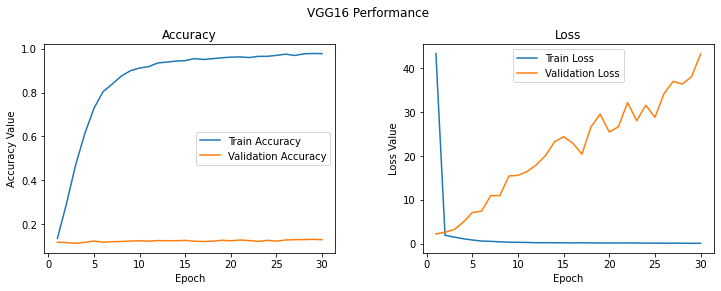

In [21]:
import matplotlib.pyplot as plt
# plotting accuracy
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")